# 1. Loading Data and Managing Data Types

In this recipe, we show how to load a dataset into Python. 
In order to show the entire pipeline including working with messy data.
We apply some transformation to the original dataset.
For more information on applied changes, please refer to the accompanying GitHub repositoty
### How to do it
Execute the following steps to load a dataset into Python

1. Import the libraries:

In [1]:
import pandas as pd

2. Preview a CSV file:

In [18]:
! head -n 5 '/Users/minhdang/Documents/Minh_U/Portfolio/US_consumer_loan/cookbook.csv'

acc_open_past_24mths,apr,contractual_payment_amount,current_rating,dti,dti_incl_mortgage,fico_range_high,inquires_6mo,interest_rate_adj,interest_rate_exp,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,months_since_credit_inquiry,months_since_recent_bankcard_acc_open,num_accounts_open_12m,num_bankcards,num_bankcards_good_standing,num_delinq_2years,num_mortgage_accounts,num_open_accounts,num_public_records,original_contractual_due_day,original_principal_balance,outstanding_principal_balance,pct_trades_never_delinquent,percent_bc_gt_75,primary_income,purchase_interest,purchase_price,recovery_amount,recovery_collection_fee,region_or_state,remaining_term,revolving_utilization,term,tot_accounts,tot_cred_bal_ex_mort,tot_cred_rev_bal,total_public_records_bankruptcy,accrued_interest,Month_on_book,dff,cpi,unrate,target
5.0,0.2465,349.63,NEAR_PRIME,0.083653846154,0.466451928778,634,1.0,0.1929,0.1929,46.0,10.0,3.0,10.0,2.0,7.0,5.0,0.0,0.0,7.0,0.0,21.0,9500.0,9500.0,1.0,0.6,33280.0,15.06,9515.06,,,NV,3

3. Load the data from the CSV file:

In [188]:
df = pd.read_csv('/Users/minhdang/Documents/Minh_U/Portfolio/US_consumer_loan/cookbook.csv', low_memory=False)

The DataFrame has 705695 rows and 45 columns

4. Separate the features from the target

In [189]:
X = df.copy()
y = X.pop('target')

After running this block of code, x no longer contains the target columns

### How it works...
- In Step 1, we imported the pandas library.
- In Step 2, we used the bash command head (with an additional argument -n 5) to preview the first five rows of the CSV file. This can come in handy when we want to determine what kind of data we are dealing with, without opening a potentially large text file.
Inspecting a few rows of the dataset raised the following questions:
    - What is the separator?
    - Are there any special characters that need to be escaped?
    - Are there any missing values and, if so, what scheme (NA, empty string, nan and so on) is used for them?
    - What variables types (floats, integers, strings) are in the file? Based on that information, we can try to optimize memory usage while loading the file.
- In Step 3, we loaded the CSV file by using the pd.read_csv function. When doing so, we indicated that the first column (zero-indexed) contained the index, and empty strings should be interpreted as missing values. 
- In the last step, we separated the features from the target by using the pop method. It assigned the given column to the new variable, while removing it from the source DataFrame
- In the following, we provide a simplified description of the variables:

- The target variable indicates whether the customer defaulted on the payment in the following month.


### There's more...
- In general, pandas tries to load and store data efficiently. It automatically assigns data types (which we can inspect by calling the dtypes method of a pandas DataFrame). However, there are some tricks that can lead to much better memory allocation, which definitely make working with larger tables (in hundreds of MBs, or even GBs) easier.

1. We start by inspecting the data types in our DataFrame:

In [190]:
df.dtypes

acc_open_past_24mths                     float64
apr                                      float64
contractual_payment_amount               float64
current_rating                            object
dti                                      float64
dti_incl_mortgage                        float64
fico_range_high                            int64
inquires_6mo                             float64
interest_rate_adj                        float64
interest_rate_exp                        float64
mo_sin_old_rev_tl_op                     float64
mo_sin_rcnt_rev_tl_op                    float64
months_since_credit_inquiry              float64
months_since_recent_bankcard_acc_open    float64
num_accounts_open_12m                    float64
num_bankcards                            float64
num_bankcards_good_standing              float64
num_delinq_2years                        float64
num_mortgage_accounts                    float64
num_open_accounts                        float64
num_public_records  

- In the preceding image, we see a few distinct data types: floats (floating-point numbers, such as 3.42), integers, and objects. The last ones are the pandas representation of string variables. The number next to float and int indicates how many bits this type uses to represent a particular value. The default types use 64 bits of memory.
- We also leverage a special type called category. The underlying idea is that string variables are encoded as integers, and pandas uses a special mapping dictionary to decode them back into their original form. This is especially useful when dealing with a limited number of distinct string values (for example, current_rating, region_or_state, and so on).

2. We define a function, which we use to inspect how much memory (in MBs) a DataFrame actually uses:

In [191]:
def get_df_memory_usage (df, top_columns=5):
    print('Memory usage ----')
    memory_per_column = df.memory_usage(deep=True) / 1024 ** 2
    print(f'Top {top_columns} columns by memory (MB):')
    print(memory_per_column.sort_values(ascending=False) \
                                   .head(top_columns))
    print(f'Total size: {memory_per_column.sum():.4f} MB')

3. Inspect the size of the initial DataFrame (just as we loaded it from the source CSV file):

In [192]:
get_df_memory_usage(df)

Memory usage ----
Top 5 columns by memory (MB):
current_rating                40.158072
region_or_state               39.706802
original_principal_balance     5.384026
term                           5.384026
percent_bc_gt_75               5.384026
dtype: float64
Total size: 311.3781 MB


- In total, the DataFrame uses ~311 MB of memory, with ~25% of that used by columns with the object data type. This is still very small in terms of the current machines' capabilities, however, the memory-saving principles we show here apply just as well to DataFrames measured in gigabytes.
- We create a copy of the original DataFrame and change the types of the object columns to category. We first select the names of the columns with variables of the object type (using the select_dtypes method), and then convert them to a categorical type using the astype method.

4. Convert object columns to categorical:

In [193]:
df_cat = df.copy()
object_columns = df_cat.select_dtypes(include='object').columns
df_cat[object_columns] = df_cat[object_columns].astype('category')

5. Inspect the size of the DataFrame:

In [194]:
get_df_memory_usage(df_cat)

Memory usage ----
Top 5 columns by memory (MB):
original_principal_balance     5.384026
acc_open_past_24mths           5.384026
pct_trades_never_delinquent    5.384026
percent_bc_gt_75               5.384026
primary_income                 5.384026
dtype: float64
Total size: 232.8672 MB


- With this simple transformation, we managed to reduce the size (memory-wise) of the DataFrame by ~80%. We could also downcast the integer columns (currently using the int64 type) to something much smaller memory-wise, but for that, we would need to inspect the min and max values for each column and determine which type would be the best fit. We do not do this here; however, the process of using astype is the same.

# 2. Explore Data Analysis

- The second step, after loading the data, is to carry out Exploratory Data Analysis (EDA). By doing this, we get to know the data we are supposed to work with. Some insights we try to gather are:
    - What kind of data do we actually have, and how should we treat different types?
    - What is the distribution of the variables?
        - Are there outliers in the data, and how can we treat them?
        - Are any transformations required? For example, some models work better with (or require) normally distributed variables, so we might want to use techniques such as log transformation.
        - Does the distribution vary per group (for example, gender or education level)?
    - Do we have cases of missing data? How frequent are these, and in which variables?
    - Is there a linear relationship between some variables (correlation)? Can we create new features using the existing set of variables? An example might be deriving hour/minute from a timestamp, day of the week from a date, and so on.
    - Are there any variables that we can remove as they are not relevant for the analysis? An example might be a randomly generated customer identifier.
- EDA is extremely important in all data science projects, as it enables analysts to develop an understanding of the data, facilitates asking better questions, and makes it easier to pick modeling approaches suitable for the type of data being dealt with.
- In real-life cases, it makes sense to carry out univariate analysis (one feature at a time) for all relevant features to get a good understanding of them, and then proceed to multivariate analysis (comparing distributions per group, correlations, and so on). For brevity, we only show some popular approaches on selected features, but a deeper analysis is highly encouraged.

### How to do it...
Execute the following steps to carry out EDA

1. Import the libraries:

In [195]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

2. Get summary statistics for numeric variables

In [196]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
acc_open_past_24mths,373365.0,5.65,3.60,0.00,3.00,5.00,8.00,39.00
apr,705695.0,0.24,0.07,0.06,0.19,0.25,0.29,0.36
contractual_payment_amount,705695.0,340.41,264.86,0.00,142.58,272.05,469.02,2018.47
dti,687589.0,0.26,2.30,0.00,0.11,0.18,0.27,99.99
dti_incl_mortgage,420870.0,0.89,22.49,0.00,0.26,0.36,0.47,999.99
fico_range_high,705695.0,671.08,43.74,511.00,640.00,670.00,699.00,850.00
inquires_6mo,445528.0,0.93,1.29,-4.00,0.00,1.00,2.00,33.00
interest_rate_adj,444319.0,0.21,0.06,0.00,0.16,0.21,0.25,0.35
interest_rate_exp,705695.0,0.20,0.07,0.00,0.15,0.20,0.25,0.35
mo_sin_old_rev_tl_op,374120.0,140.58,87.70,2.00,79.00,119.00,183.00,822.00


3. Get summary statistics for categorical variables:

In [197]:
df.describe(include='object').transpose()

,count,unique,top,freq
current_rating,705695,37,P3,126507
region_or_state,705680,51,CA,91310


4. Define and run a function for plotting the correlation heatmap:

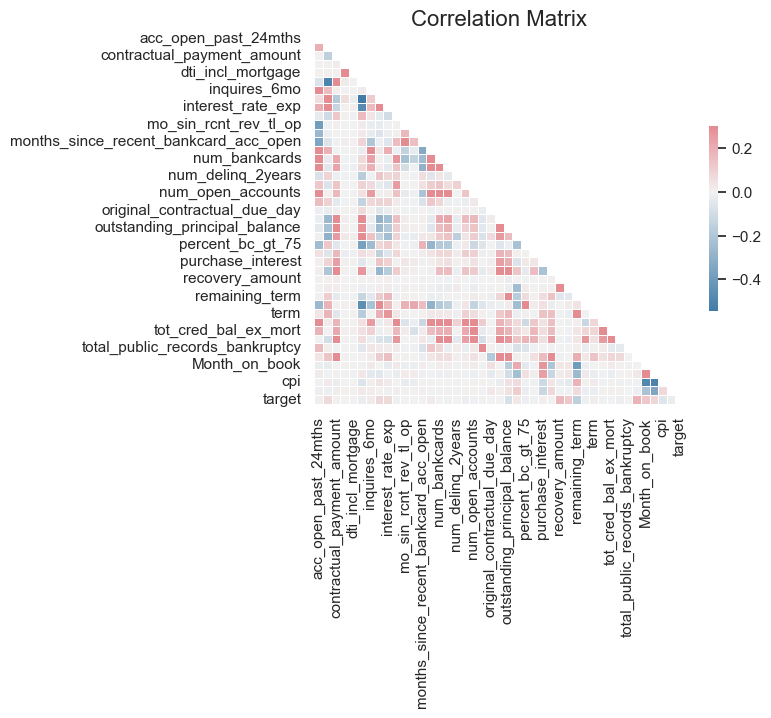

In [198]:
def plot_correlation_matrix(corr_mat):
    sns.set(style='white')

    mask = np.zeros_like(corr_mat, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots()
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
    sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=0.3, center=0,
                square=True, linewidths=.5, cbar_kws={'shrink': .5}, ax=ax)
    ax.set_title('Correlation Matrix', fontsize = 16)
    sns.set(style='darkgrid')
corr_mat = df.select_dtypes(include='number').corr()
plot_correlation_matrix(corr_mat)


- In the plot, we can see that age seems to be uncorrelated to any of the other features.

5. Investigate the distribution of the target variable per current_rating and
region_or_state  

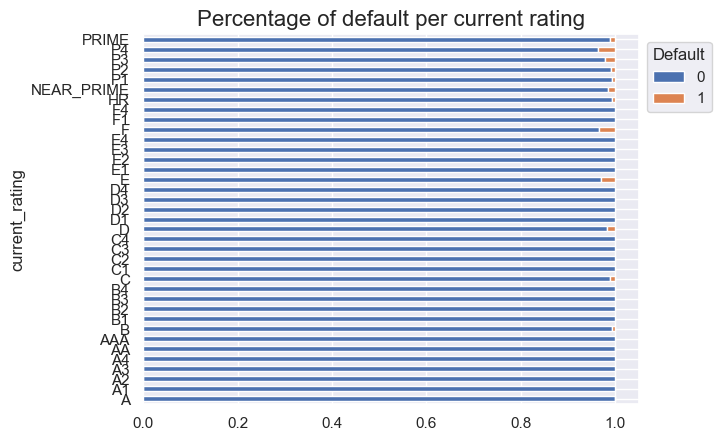

In [199]:
ax = df.groupby('current_rating')['target'].value_counts(normalize=True).unstack().plot(kind='barh', stacked='True')
ax.set_title('Percentage of default per current rating', fontsize=16)
ax.legend(title='Default', bbox_to_anchor=(1,1))

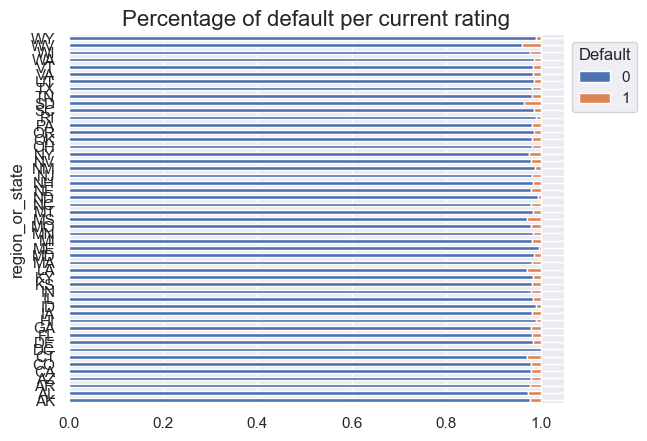

In [200]:
ax = df.groupby('region_or_state')['target'].value_counts(normalize=True).unstack().plot(kind='barh', stacked='True')
ax.set_title('Percentage of default per current rating', fontsize=16)
ax.legend(title='Default', bbox_to_anchor=(1,1))

### How it works...
- We started the analysis by using a very simple, yet powerful method of
a pandas DataFrame —describe. It printed summary statistics, such as count, mean, min/max, and quartiles of all the numeric variables in the DataFrame. By inspecting these metrics, we could infer the value range of a certain feature, or whether the distribution was skewed (by looking at the difference between mean and median). Also, we could easily spot values outside the plausible range—for example, a negative or very small age.
- The count metric represents the number of non-null observations, so it is also a way to determine which numeric features contain missing values. Another way of investigating the presence of missing values is by running df.isnull().sum(). For more information on missing values, please see the Dealing with missing values recipe.
- In the third step, we added the include='object' argument to the
describe method, to inspect the categorical features separately. The output was different from the numeric features: we could see the count, the number of unique categories, which one was the most frequent, and how many times it appeared in the dataset.
- In Step 4, we defined a function for plotting a heatmap representing the correlation matrix. In the function, we used a couple of operations to mask the upper triangular matrix, together with the diagonal (all correlations equal to 1 on the diagonal). This way, the output was easier to interpret.
- To calculate the correlations, we used the corr method of a DataFrame, which by default calculated Pearson's correlation coefficient. We did this only for numeric features. There are also methods for calculating the correlation of categorical features, but this is beyond the scope of this chapter. Inspecting correlations is crucial, especially when using machine learning algorithms that assume linear independence of the features (such as linear regression).
- In the last step, we investigated the distribution of the target variable (default) per current_rating and state_or_region.

# 3. Splitting data into training and test sets

- Having completed the EDA, the next step is to split the dataset into training and test sets. The idea is to have two separate datasets:
    - Training set — On this part of the data, we train a machine learning model
    - Test set — This part of the data was not seen by the model during training, and is used to evaluate the performance
- What we want to achieve by splitting the data is preventing overfitting. Overfitting is a phenomenon whereby a model finds too many patterns in data used for training and performs well only on that particular data. In other words, it fails to generalize to unseen data.
- This is a very important step in the analysis, as doing it incorrectly can introduce bias, for example, in the form of data leakage. Data leakage can occur when, during the training phase, a model observes information to which it should not have access. We follow up with an example. A common scenario is that of imputing missing values with the feature's average. If we had done this before splitting the data, we would have also used data from the test set to calculate the average, introducing data leakage. That is why the proper order would be to split the data into training and test sets first and then carry out the imputation, using the data observed in the training set.
- Additionally, this approach ensures consistency, as unseen data in the future (new customers that will be scored by the model) will be treated in the same way as the ones data in the test set.

### How to do it
Execute the following steps to split the dataset into training and test sets.

1. Import the function from sklearn:

In [201]:
from sklearn.model_selection import train_test_split

2. Split the data into training and test sets:

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

3. Verify that the ratio of the target is preserved:

In [203]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.980213
1    0.019787
Name: target, dtype: float64
0    0.980211
1    0.019789
Name: target, dtype: float64


### How it works...
- We first imported the train_test_split function from the
model_selection module of scikit-learn. 
- In the second step, we showed how to do the most basic split. We passed X and y objects to the train_test_split function. Additionally, we specified the size of the test set, as a fraction of all observations. For reproducibility, we also specified the random state. We also had to assign the output of the function to four new objects.
- In the last step, we also specified the stratification argument by passing the target variable (stratify=y). Splitting the data with stratification means that both the training and test sets will have a possibly identical distribution of the specified variable. This parameter is very important when dealing with imbalanced data

### There's more...
- It is also common to split data into three sets: training, validation, and test. The validation set is used for frequent evaluation and tuning of the model's hyperparameters. Suppose we want to train a XG Boosting classifier and find the optimal value of the max_depth hyperparameter, which decides the maximum depth of the tree. To do so, we can train the model multiple times using the training set, and each time with a different value of the hyperparameter. Then, we can evaluate the performance of all these models, using the validation set. We pick the best model of those, and then, finally, evaluate its performance on the test set.
- In the following code block, we illustrate a possible way of creating a train- validation-test split, using the same train_test_split function:

In [204]:
# define the size of the validation and test sets
VALID_SIZE = 0.1
TEST_SIZE = 0.2
# create the initial split - training and temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(VALID_SIZE + TEST_SIZE), stratify=y, random_state=42)
# calculate the new test size
NEW_TEST_SIZE = np.around(TEST_SIZE / (VALID_SIZE + TEST_SIZE), 2)
# create the valid and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp,
test_size=NEW_TEST_SIZE, stratify=y_temp, random_state=42)

- We basically ran train_test_split; however, we had to adjust the sizes of the test_size input in such a way that the initially defined proportions (70-10- 20) were preserved.
- Sometimes, we do not have enough data to split it into three sets, either because we do not have that many observations in general or because the data can be highly imbalanced, and we would remove valuable training samples from the training set.

# 4. Dealing with missing values

- In most real-life cases, we do not work with clean, complete data. One of the potential problems we are bound to encounter is that of missing values. We can categorize missing values by the reason they occur:
    - Missing completely at random (MCAR)—The reason for the missing data is unrelated to the rest of the data. An example could be a respondent accidentally missing a question in a survey.
    - Missing at random (MAR)—The missingness of the data can be inferred from data in another column(-s). For example, the missingness to a response to a certain survey question can be to some extent determined conditionally by other factors such as gender, age, lifestyle, and so on.
    - Missing not at random (MNAR)—When there is some underlying reason for the missing values. For example, people with very high incomes tend to be hesitant about revealing it.
    - Structurally missing data—Often a subset of MNAR, the data is missing because of a logical reason. For example, when a variable representing the age of a spouse is missing, we can infer that a given person has no spouse.
- While some machine learning algorithms can account for missing data (for example, XG Boosting can treat missing values as a separate and unique value), many algorithms cannot, or their popular implementations (such as the ones in scikit-learn) do not incorporate this functionality.
- Some popular solutions include:
    - Drop observations with one, or more, missing values—While this is the easiest approach, it is not always a good one, especially in the case of small datasets. Even if there is only a small fraction of missing values per feature, they do not necessarily occur for the same observations (rows), so the actual number of rows to remove can be much higher. Additionally, in the case of data missing not at random, removing such observations from the analysis can introduce bias into the results.
    - Replace the missing values with a value far outside the possible range, so that algorithms such as decision trees can treat it as a special value, indicating missing data.
    - In the case of dealing with time series, we can use forward-filling (take the last-known observation before the missing one), backward-filling (take the first-known observation after the missing one), or interpolation (linear or more advanced).
    - Replace the missing values with an aggregate metric—for continuous data, we can use the mean (when there are no clear outliers in the data) or median (when there are outliers). In the case of categorical variables, we can use mode (the most common value in the set). A potential disadvantage of mean/median imputation is the reduction of variance in the dataset.
    - Replace the missing values with aggregate metrics calculated per group—for example, when dealing with body-related metrics, we can calculate the mean or median per gender, to more accurately replace the missing data.
    - ML-based approaches—We can treat the considered feature as a target, and use complete cases to train a model and predict values for the missing observations.

### How to do it...
Execute the following steps to investigate and deal with missing values in the dataset.

1. Import the libraries

In [205]:
import pandas as pd
import missingno
from sklearn.impute import SimpleImputer

2. Inspect the information about the DataFrame:

In [206]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705695 entries, 0 to 705694
Data columns (total 44 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   acc_open_past_24mths                   373365 non-null  float64
 1   apr                                    705695 non-null  float64
 2   contractual_payment_amount             705695 non-null  float64
 3   current_rating                         705695 non-null  object 
 4   dti                                    687589 non-null  float64
 5   dti_incl_mortgage                      420870 non-null  float64
 6   fico_range_high                        705695 non-null  int64  
 7   inquires_6mo                           445528 non-null  float64
 8   interest_rate_adj                      444319 non-null  float64
 9   interest_rate_exp                      705695 non-null  float64
 10  mo_sin_old_rev_tl_op                   374120 non-null  

3. Visualize the nullity of the DataFrame:

<Axes: >

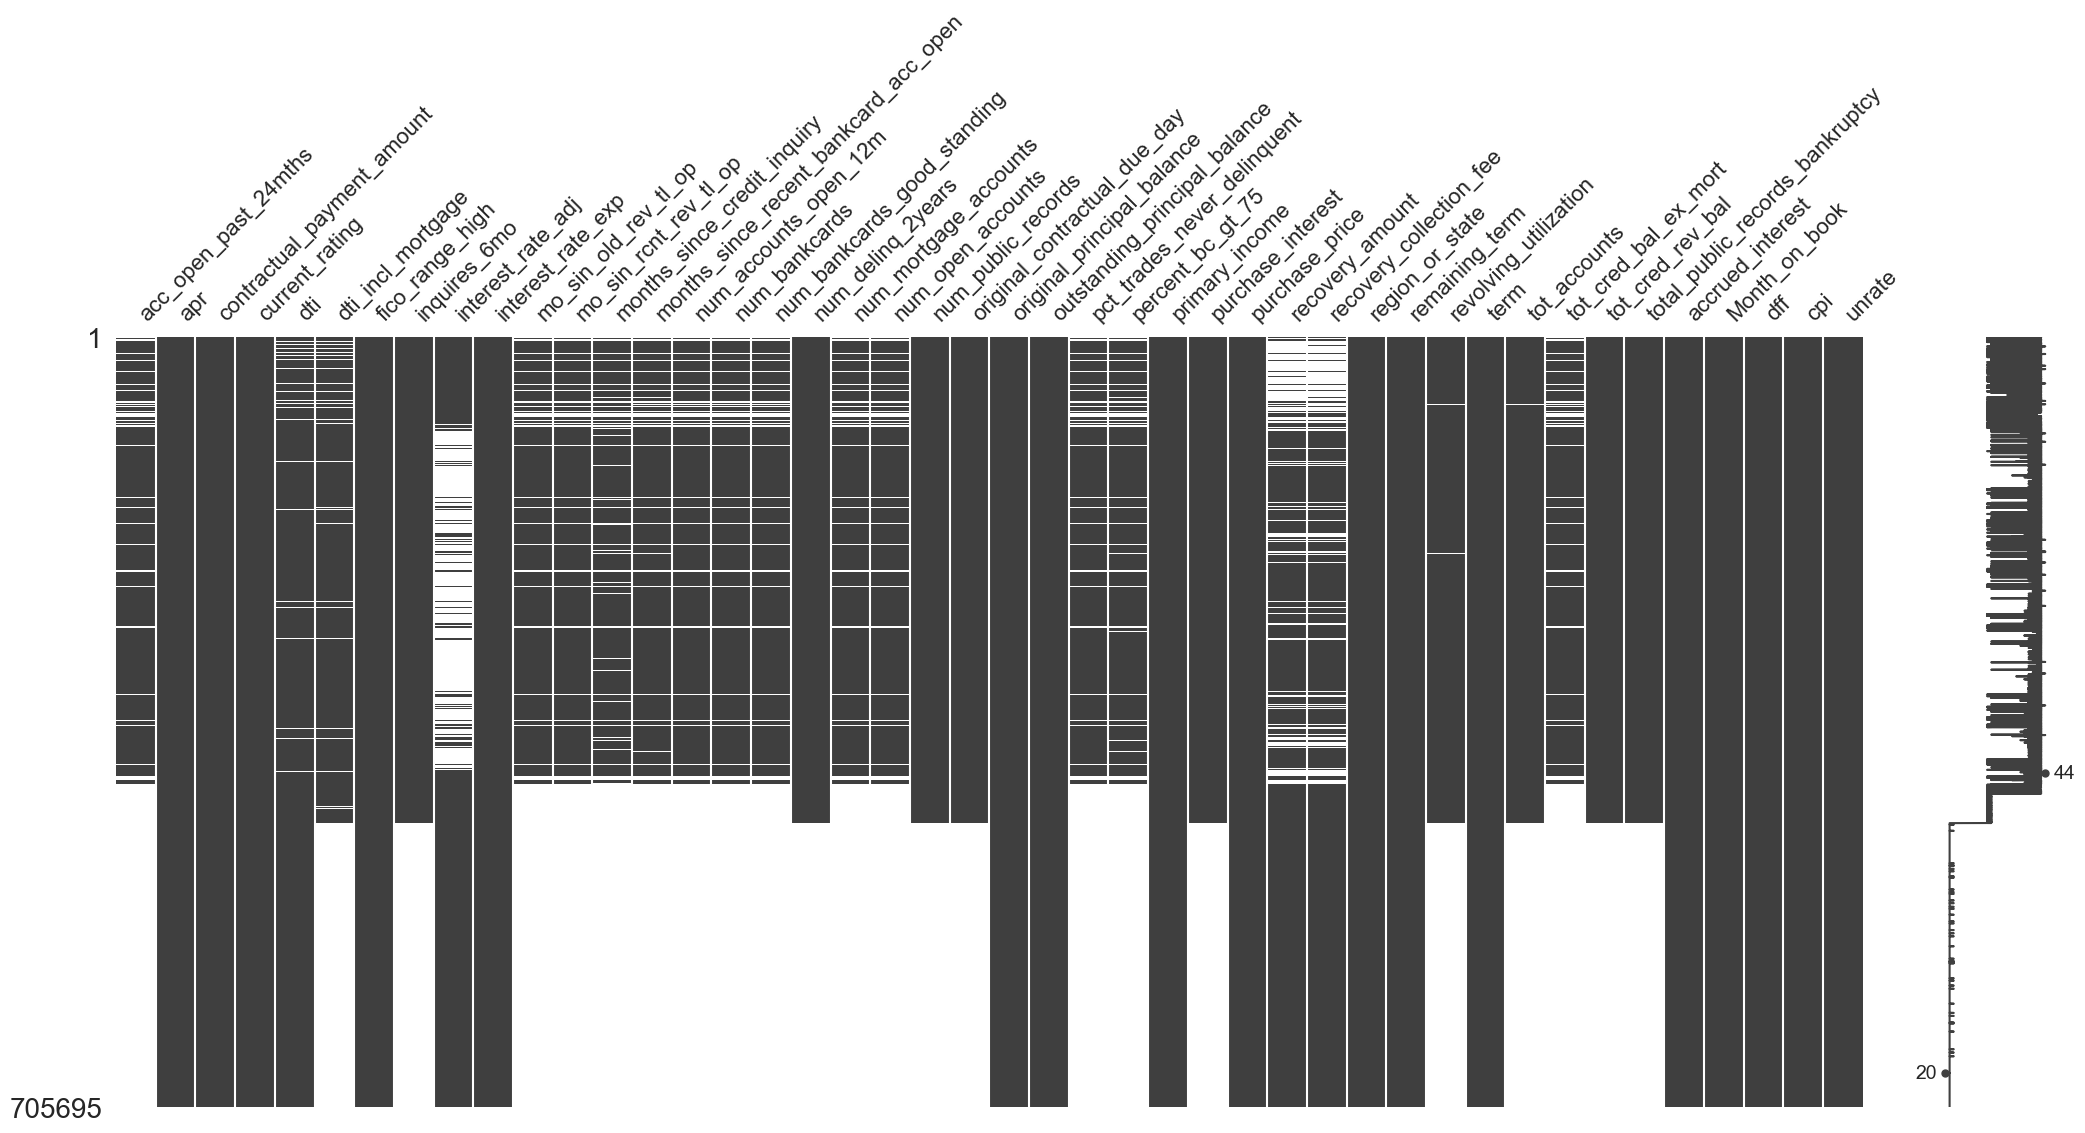

In [207]:
missingno.matrix(X)

- The white bars visible in the columns represent missing values. The line on the right side of the plot describes the shape of data completeness. The two numbers indicate the maximum and minimum nullity in the dataset (there are 44 columns in total, and the row with the most missing values contains 2—hence the 20).

4. Define columns with missing values per data type:

In [208]:
NUM_FEATURES = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).isnull().any()].tolist()
CAT_FEATURES = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()].tolist()

5. Impute numerical features:

In [209]:
for col in NUM_FEATURES:
        num_imputer = SimpleImputer(strategy='median')
        num_imputer.fit(X_train[[col]])
        X_train.loc[:, col] = num_imputer.transform(X_train[[col]])
        X_test.loc[:, col] = num_imputer.transform(X_test[[col]])

6. Impute categorical features:

In [210]:
for col in CAT_FEATURES:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = cat_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = cat_imputer.transform(X_test[[col]])

7. Verify that there are no missing values:

In [211]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493986 entries, 247582 to 264402
Data columns (total 44 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   acc_open_past_24mths                   493986 non-null  float64
 1   apr                                    493986 non-null  float64
 2   contractual_payment_amount             493986 non-null  float64
 3   current_rating                         493986 non-null  object 
 4   dti                                    493986 non-null  float64
 5   dti_incl_mortgage                      493986 non-null  float64
 6   fico_range_high                        493986 non-null  int64  
 7   inquires_6mo                           493986 non-null  float64
 8   interest_rate_adj                      493986 non-null  float64
 9   interest_rate_exp                      493986 non-null  float64
 10  mo_sin_old_rev_tl_op                   493986 non-n

- We can inspect the output, to confirm that there are no missing values in x

### How it works...
- In Step 1, we imported the required libraries. 
- Then, we used the info method of a pandas DataFrame to view information about the columns, such as their type and the number of non-null observations. Another possible way of inspecting the number of missing values per column is to run X.isnull().sum().
- In Step 3, we visualized the nullity of the DataFrame, with the help of the missingno library.
- In Step 4, we defined lists containing features we wanted to impute, one list per data type. The reason for this is the fact that numeric features are imputed using different strategies than the categorical features. For basic imputation, we used the SimpleImputer class from scikit-learn.
- In Step 5, we iterated over the numerical features (in this case, only the
age feature), and used the median to replace the missing values. Inside the loop, we defined the imputer object with the correct strategy (median), fitted it to the given column of the training data, and transformed both the training and test data. This way, the median was estimated by only using the training data, preventing potential data leakage.
- Step 6 is analogical to Step 5, where we used the same approach to iterate over categorical columns. The difference lies in the selected strategy—we used the most frequent value (most_frequent) in the given column. This strategy can be used for both categorical and numerical features; in the latter case, this is the mode.

### There's more...
- In this recipe, we mentioned how to impute missing values. Approaches such as replacing the missing value with one large value or the mean/median/mode are called single imputation approaches, as they replace missing values with one specific value. However, there are also multiple imputation approaches, and one of those is Multiple Imputation by Chained Equations (MICE). In short, the algorithm runs multiple regression models, and each missing value is determined conditionally on the basis of the non-missing data points. A potential benefit of using an ML-based approach to imputation is the reduction of bias introduced by single imputation.
- The MICE algorithm is available in scikit-learn, under the name of IterativeImputer, in the impute module

# 5. Remove Outliers

- Transforming/removing outliers: During the EDA, we often see some feature values that are extreme and can be caused by some kind of error (for example, adding an extra digit to the age) or are simply incompatible with the rest (for example, a multimillionaire among a sample of middle-class citizens). Such outliers can skew the results of the model, and it is good practice to somehow deal with them. One solution would be to remove them at all, but this can have an impact on the model's ability to generalize. We can also bring them closer to regular values.

### How to do it...
Execute the following steps to handle outliers

1. Import the base estimator and transformer from sklearn:

In [212]:
from sklearn.base import BaseEstimator, TransformerMixin

2. Define the OutlierRemover class:

In [213]:
class OutlierRemover(BaseEstimator, TransformerMixin):
               def __init__(self, n_std=3):
                   self.n_std = n_std
               def fit(self, X, y = None):
                   if np.isnan(X).any(axis=None):
                       raise ValueError('''There are missing values in the
                                           array! Please remove them.''')
                   mean_vec = np.mean(X, axis=0)
                   std_vec = np.std(X, axis=0)
                   self.upper_band_ = mean_vec + self.n_std * std_vec
                   self.lower_band_ = mean_vec - self.n_std * std_vec
                   self.n_features_ = len(self.upper_band_)
                   return self
               def transform(self, X, y = None):
                   X_copy = pd.DataFrame(X.copy())
                   upper_band = np.repeat(
                       self.upper_band_.reshape(self.n_features_, -1),
                       len(X_copy),
                       axis=1).transpose()
                   lower_band = np.repeat(
                       self.lower_band_.reshape(self.n_features_, -1),
                       len(X_copy),
                       axis=1).transpose()
                   X_copy[X_copy >= upper_band] = upper_band
                   X_copy[X_copy <= lower_band] = lower_band
                   return X_copy.values

# 6. Encoding categorical variables

- In the previous recipes, we have seen that some features are categorical variables (originally represented as either object or category data types). However, most machine learning algorithms work exclusively with numeric data. That is why we need to encode categorical features into a representation compatible with the models.
- In this recipe, we use popular encoding approache: one-hot encoding 
- In this approach, for each category of a feature, we create a new column (sometimes called a dummy variable) with binary encoding to denote whether a particular row belongs to this category.

### How to do it...
Execute the following steps to encode categorical variables.

1. Import the libraries:

In [270]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

2. Use One Hot Encoder to encode a selected column:

In [271]:
one_hot_encoder = OneHotEncoder(sparse=False,
                                handle_unknown='error',
                                drop='first')
one_hot_transformer = ColumnTransformer([('one_hot', one_hot_encoder, CAT_FEATURES)])
one_hot_transformer.fit(X_train)

/Users/minhdang/anaconda3/envs/Python_3_11_4/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['current_rating', 'region_or_state'])])

### How it works...
- First, we imported the necessary libraries. 
- In the second step, we selected the column we wanted to encode using one hot encoder, instantiated the one hot encoder, fitted it to the training data, and transformed both the training and the test data.

### There's more...
- Summing up, we should avoid label encoding when it introduces false order to the data, which can, in turn, lead to incorrect conclusions. Tree-based methods (decision trees, Random Forest, and so on) can work with categorical data and label encoding. However, for algorithms such as linear regression, models calculating distance metrics between features (k-means clustering, k-Nearest Neighbors, and so on) or Artificial Neural Networks (ANN), the natural representation is one-hot encoding.

# 7. Handling imbalanced data

- A very common issue when working with classification tasks is that of class imbalance: when one class is highly outnumbered in comparison to the second one (this can also be extended to multi-class). In general, we are talking about imbalance when the ratio of the two classes is not 1:1. In some cases, a delicate imbalance is not that big of a problem, but there are industries/problems in which we can encounter ratios of 100:1, 1000:1, or even worse.

In [223]:
y_train.value_counts(normalize=True)

0    0.980212
1    0.019788
Name: target, dtype: float64

- In this recipe, our dataset the default class is only 1.98% of the entire sample. In such cases, gathering more data (especially of the default class) might simply not be feasible, and we need to resort to some techniques that can help us in understanding and avoiding the accuracy paradox.
Accuracy paradox refers to a case in which inspecting accuracy as the evaluation metric creates the impression of having a very good classifier (a score of 90%, or even 99.9%), while in reality, it simply reflects the distribution of the classes. That is why, in cases of class imbalance, it is highly advisable to use evaluation metrics that account for that, such as precision/recall, F1 Score, or Cohen's kappa.

### How to do it...
Execute the following steps to handling class imbalance

1. Import the libraries:

In [225]:
from imblearn.over_sampling import RandomOverSampler

2. Oversample the data

In [226]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
y_train_ros.value_counts(normalize=True)

0    0.5
1    0.5
Name: target, dtype: float64

- After oversample the data, default class account for 50

### How it works...
- In Step 1, we loaded the required libraries.
- In Step 2, we used the RandomOverSampler class from the imblearn library to randomly oversample the minority class in order to match the size of the majority class

# 8. Fitting a XG Boosting classifier

- Extreme Gradient Boosting (XGBoost): XGBoost is an implementation of Gradient Boosted Trees that incorporates a series of improvements resulting in superior performance (both in terms of evaluation metrics and time). Since being published, the algorithm was successfully used to win many data science competitions. In this recipe, we only present a high-level overview of the distinguishable features. For a more detailed overview, please refer to the original paper or documentation. The key concepts of XGBoost are:
    - XGBoost combines a pre-sorted algorithm with a histogram-based algorithm to calculate the best splits. This tackles a significant inefficiency of Gradient Boosted Trees, that is, for creating a new branch, they consider the potential loss for all possible splits (especially important when considering hundreds, or thousands, of features).
    - The algorithm uses the Newton-Raphson method for boosting (instead of gradient descent)—it provides a direct route to the minimum/minima of the loss function.
    - XGBoost has an extra randomization parameter to reduce the correlation between the trees.
    - XGBoost combines Lasso (L1) and Ridge (L2) regularization to prevent overfitting.
    - It offers a different (more efficient) approach to tree pruning.
    - XGBoost has a feature called monotonic constraints (that other models, such as LightGBM, lack)—the algorithm sacrifices some accuracy, and increases the training time to improve model interpretability.
    - XGBoost does not take categorical features as input—we must use some kind of encoding.
    - The algorithm can handle missing values in the data.

### How to do it...
Execure the following steps to fit a decision tree classifier

1. Import the libraries:

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import specificity_score

2. Create an instance of the model, fit it to the training data, and create the prediction:

In [227]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_ros, y_train_ros)
y_pred = xgb_model.predict(X_test)

3. Evaluate the results:

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
kappa = specificity_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("ROC Score:", roc_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Specificity Score", kappa)

Accuracy: 0.9518914879517223
ROC Score: 0.9466626727047515
Precision: 0.6414053088347277
Recall: 0.9466626727047515
F1-Score: 0.7056395089417349
Specificity Score 0.9521069627946116


### How it works...
- In Step 1, we import library
- In Step 2, we used the typical scikit-learn approach to train a machine learning model. First, we created the object of the XGBClassifier class (using all the default settings). Then, we fitted the model to the training data (we needed to pass both the features and the target), using the fit method. Lastly, we obtained the predictions by using the predict method.
- In Step 3, we evaluated the performance of the model. We used a custom function to display all the results. We will not go deeper into its specifics, as it is quite standard and is built using functions from the metrics module of scikit-learn. For a detailed description of the function, please refer to the accompanying GitHub repository.
- The confusion matrix summarizes all possible combinations of the predicted values as opposed to the actual target. It has a structure that looks like the following:

TN | FP

FN | TP
- The values are as follows:
   - True positive (TP): The model predicts a default, and the client defaulted.
   - False positive (FP): The model predicts a default, but the client did not default.
   - True negative (TN): The model predicts a good customer, and the client did not default.
   - False negative (FN): The model predicts a good customer, but the client defaulted.
- Using these values, we can further build multiple evaluation criteria:
   - Accuracy ((TP + TN) / (TP + FP + TN + FN))—Measures the model's overall ability to correctly predict the class of the observation.
   - Precision (TP / (TP + FP))—Out of all predictions of the positive class (in our case, the default), how many observations indeed defaulted.
   - Recall (TP /(TP + FN))—Out of all positive cases, how many were predicted correctly. Also called sensitivity or the true positive rate. 
   - F-1 Score—A harmonic average of precision and recall. The reason for a harmonic mean instead of a standard mean is that it punishes extreme outcomes, such as precision = 1 and recall = 0, or vice versa. 
   - Specificity (TN / (TN + FP))—Measures what fraction of negative cases (clients without a default) actually did not default.
- Understanding the subtleties behind these metrics is very important for the correct evaluation of the model's performance. Accuracy can be highly misleading in the case of class imbalance. Imagine a case when 99% of data is not fraudulent and only 1% is fraudulent. Then, a naïve model classifying each observation as non-fraudulent achieves 99% accuracy, while it is actually worthless. That is why, in such cases, we should refer to precision or recall. When we try to achieve as high precision as possible, we will get fewer false positives, at the cost of more false negatives. When optimizing for recall, we will achieve fewer false negatives, at the cost of more false positives. The metric on which we try to optimize should be selected based on the use case.


### There's more...
- The ROC curve loses its credibility when it comes to evaluating the performance of the model when we are dealing with class imbalance. That is why, in such cases, we should use another curve—the Precision-Recall curve. That is because, for calculating both precision and recall, we do not use the true negatives, and only consider the correct prediction of the minority class (the positive one).

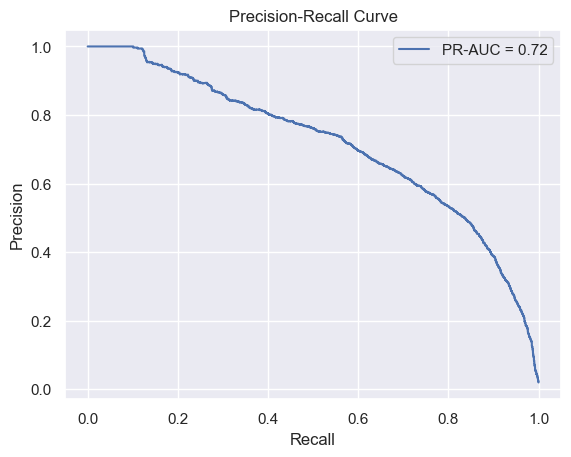

In [230]:
# Calculate precision and recall for different thresholds:
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob)
# Having calculated the required elements, we can plot the curve:
ax = plt.subplot()
ax.plot(recall, precision, label=f'PR-AUC = {metrics.auc(recall, precision):.2f}')
ax.set(title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')
ax.legend()

- As a summary metric, we can approximate the area under the Precision- Recall curve by calling metrics.auc(recall, precision). In contrast to the ROC- AUC, the PR-AUC ranges from 0 to 1, where 1 indicates the perfect model. A model with a PR-AUC of 1 can identify all the positive observations (perfect recall), while not wrongly labeling a single negative observation as a positive one (perfect precision). We can consider models that bow towards the (1, 1) point as skillful.

# 9. Implementing scikit-learn's piplines

- In the previous recipes, we showed all the steps required to build a machine learning model —starting with loading data, splitting it into a training and a test set, imputing missing values, encoding categorical features, and—lastly —fitting a XG Boosting classifier.
- The process requires multiple steps to be executed in a certain order, which can sometimes be tricky with a lot of modifications to the pipeline mid- work. That is why scikit-learn introduced Pipelines. By using Pipelines, we can sequentially apply a list of transformations to the data, and then train a given estimator (model).
- One important point to be aware of is that the intermediate steps of the Pipeline must have the fit and transform methods (the final estimator only needs the fit method, though). Using Pipelines has several benefits:
    - The flow is much easier to read and understand—the chain of operations to be executed on given columns is clear
    - The order of steps is enforced by the Pipeline
    - Increased reproducibility
- In this recipe, we show how to create the entire project's pipeline, from loading the data to training the classifier.

### How to do it...
Execute the following steps to build the project's pipeline.

1. Import the libraries:

In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [250]:
class OutlierRemover(BaseEstimator, TransformerMixin):
               def __init__(self, n_std=3):
                   self.n_std = n_std
               def fit(self, X, y = None):
                   if np.isnan(X).any(axis=None):
                       raise ValueError('''There are missing values in the
                                           array! Please remove them.''')
                   mean_vec = np.mean(X, axis=0)
                   std_vec = np.std(X, axis=0)
                   self.upper_band_ = mean_vec + self.n_std * std_vec
                   self.lower_band_ = mean_vec - self.n_std * std_vec
                   self.n_features_ = len(self.upper_band_)
                   return self
               def transform(self, X, y = None):
                   X_copy = pd.DataFrame(X.copy())
                   upper_band = np.repeat(
                       self.upper_band_.reshape(self.n_features_, -1),
                       len(X_copy),
                       axis=1).transpose()
                   lower_band = np.repeat(
                       self.lower_band_.reshape(self.n_features_, -1),
                       len(X_copy),
                       axis=1).transpose()
                   X_copy[X_copy >= upper_band] = upper_band
                   X_copy[X_copy <= lower_band] = lower_band
                   return X_copy.values

In [282]:
class RandomOverSamplerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.ros = RandomOverSampler(random_state=self.random_state)
    
    def fit(self, X, y=None):
        # The RandomOverSampler's fit method expects X and y, but it doesn't actually use y.
        # Hence, we only pass X to it.
        _, _ = self.ros.fit_resample(X, y)
        return self
    
    def transform(self, X):
        # Since we've already oversampled in the fit method, transform can simply return X.
        # The transformation has already been applied during the fit method.
        return X

2. Load the data, separate the target, and create the stratified train-test split:

In [233]:
df = pd.read_csv('/Users/minhdang/Documents/Minh_U/Portfolio/US_consumer_loan/cookbook.csv', low_memory=False, index_col=0, na_values='')
X = df.copy()
y = X.pop('target')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

3. Store lists of numerical/categorical features:

In [234]:
num_features = X_train.select_dtypes(include='number').columns.to_list()
cat_features = X_train.select_dtypes(include='object').columns.to_list()

4. Define the numerical Pipeline:

In [289]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Filling missing values with median
    ('outliers', OutlierRemover()),  # Custom transformer for outlier removal
    ('imbalance', RandomOverSamplerTransformer(random_state=42))  # Oversampling to handle class imbalance
])

5. Define the categorical Pipeline:

In [290]:
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(categories=cat_list, sparse=False, handle_unknown='error', drop='first')),
    ('imbalance', RandomOverSamplerTransformer(random_state=42))
])

6. Define the column transformer object:

In [292]:
preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, num_features),
    ('categorical', cat_pipeline, cat_features)],
            remainder='drop')

7. Create a joint Pipeline:

In [293]:
xgb = XGBClassifier(random_state=42)
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', xgb)])

8. Fit the Pipeline to the data:

In [294]:
xgb_pipeline.fit(X_train, y_train)

/Users/minhdang/anaconda3/envs/Python_3_11_4/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outliers',
                                                                   OutlierRemover()),
                                                                  ('imbalance',
                                                                   RandomOverSamplerTransformer())]),
                                                  ['apr',
                                                   'contractual_payment_amount',
                                                   'dti', 'dti_incl_mortgage',
                                                   'fico_range_high',
                                                   'inquires_6mo',
                                                   'interest_rate_adj',
                                                   'interest_rate_exp',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

9. Evaluate the performance of the entire Pipeline:

In [295]:
accuracy = accuracy_score(y_test, xgb_pipeline.predict(X_test))
roc_score = roc_auc_score(y_test, xgb_pipeline.predict(X_test))
precision = precision_score(y_test, xgb_pipeline.predict(X_test), average='macro')
recall = recall_score(y_test, xgb_pipeline.predict(X_test), average='macro')
f1 = f1_score(y_test, xgb_pipeline.predict(X_test), average='macro')
kappa = specificity_score(y_test, xgb_pipeline.predict(X_test))
print("Accuracy:", accuracy)
print("ROC Score:", roc_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Specificity Score", kappa)

Accuracy: 0.9879409659980587
ROC Score: 0.7454754896745986
Precision: 0.9089346816804076
Recall: 0.7454754896745985
F1-Score: 0.8059584316331239
Specificity Score 0.997932719413644


### How it works...
- In Step 1, we imported the required libraries. The list can look a bit daunting, but that is due to the fact that we need to combine multiple functions/classes used in the previous recipes.
- In Step 2, we loaded the data from a CSV file, separated the target variable and created the stratified train-test split. 
- Next, we also created two lists containing the names of the numerical/categorical features—we will apply different transformations depending on the type of the feature. To select the appropriate columns, we used the select_dtypes method.
- In Step 4, we started preparing the separate Pipelines. For the numerical one, we only wanted to impute the missing values of the features using the column median. For the Pipeline, we provided a list of tuples containing the steps, each of the tuples containing the name of the step (for easier identification) and the class we wanted to use, in this case, it was the SimpleImputer.
- In Step 5, we prepared a similar Pipeline for categorical features. This time, however, we chained two different operations—the imputer (using the most frequent value), and the one-hot encoder. For the encoder, we also specified a list of lists called cat_list, in which we listed all the possible categories, based on X_train. We did so mostly for the sake of the next recipe, in which we introduce cross-validation, and it can happen that some of the random draws will not contain all the categories.
- In Step 6, we defined the ColumnTransformer object, which we used to manipulate the data in the columns. Again, we passed a list of tuples, where each tuple contained a name, one of the Pipelines we defined before, and a list of columns to which the transformations should be applied. We also specified remainder='drop', to drop any extra columns to which no transformations were applied. In this case, the transformations were applied to all features, so no columns were dropped.
- In Step 7, we once again used Pipeline to chain the preprocessor (the previously defined ColumnTransformer object) with the decision tree classifier (for comparability, we set the random state to 42). 
- The last two steps involved fitting the entire Pipeline to the data and using the custom function to measure the performance of the model.

### There's more..
- In this recipe, we showed how to create the entire pipeline for a data science project. However, there are many other transformations we can apply to data as preprocessing steps. Some of them include:
    - Scaling numerical features: In other words, changing the range of the features due to the fact that different features are measured on different scales; and this can introduce bias to the model. We should mostly be concerned with feature scaling when dealing with models that calculate some kind of distance between features (such as K-Nearest Neighbors). In general, methods based on decision trees do not require any scaling. Some popular options from scikit-learn include StandardScaler and MinMaxScaler.
    - Discretizing continuous variables: We can transform a continuous variable (such as age) into a finite number of bins (such as below 25, between 25 and 50, and older than 50). When we want to create specific bins, we can use the pd.cut function, while pd.qcut is used for splitting based on quantiles.

- We designed the class similarly to the ones in scikit-learn, meaning we can train it on the training set, and only use the transformation on the test set.
- In the __init__ method, we stored the number of standard deviations that determines whether observations will be treated as outliers (the default is 3). In the fit method, we stored the upper and lower thresholds for being considered an outlier, as well as the number of features in general. In the transform method, we capped all the values, according to the 3σ symbol rule.
- One known limitation of this class is that it does not handle missing values. That is why we raise a ValueError when there are any missing values. In the Pipeline, we use the OutlierRemover after the imputation in order to avoid the issue. We could, of course, account for the missing values in the transformer, however, this would make the code longer and less readable. Please refer to the definition of SimpleImputer in scikit-learn for an example of how to mask missing values while building transformers.

# 10. Using model to predict probability of default of active loans

- When we've already trained model, we use this model to predict probability of default of active loans

### How to do it...